# Notebook with Functions to visulaize expected ROH within different Length classes given some Ne

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import gridspec
import socket
import os as os
import sys as sys
import multiprocessing as mp
import matplotlib.colors as cls
import h5py   # For Processing HDF5s

### For Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

sys.path.append("./PackagesSupport/")
from roh_expectations import Expected_Roh

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


## Test the import

In [3]:
e_roh = Expected_Roh()

In [128]:
###
vrange = [0.04, 0.8]
N_arr = [200, 1000, 5000, 25000]  # The values of 2N
c_arr = [1, 2, 3] # The value of cousins

e_roh = Expected_Roh()  # Get the object to do calculation

x_arr = np.arange(vrange[0], vrange[1], 0.0001)
bw = x_arr[1] - x_arr[0]  # Bin Width
x_mean = (x_arr[1:] + x_arr[:-1]) / 2

y_roh_cs = np.zeros((len(c_arr), len(x_mean)), dtype="float") # Container for N results
for i,c in enumerate(c_arr):
    y_roh_cs[i,:] = e_roh.exp_roh_ind_rel(x_mean, m=(c*2+4), comm_anc=4) * x_mean
    
y_roh_Ns = np.zeros((len(N_arr), len(x_mean)), dtype="float") # Container for N results
for i,N in enumerate(N_arr):
    y_roh_Ns[i,:] = e_roh.roh_pdf_allchr_N(x_mean, N=N) * x_mean

In [132]:
np.sum(y_roh_cs*bw, axis=1)

array([2.083522  , 0.52283509, 0.12856589])

In [130]:
np.sum(y_roh_Ns*bw, axis=1)

array([3.82518263, 0.82415447, 0.16738527, 0.03358086])

### Do the Plot

Saved figure to ./figures_test/roh_expectations.pdf


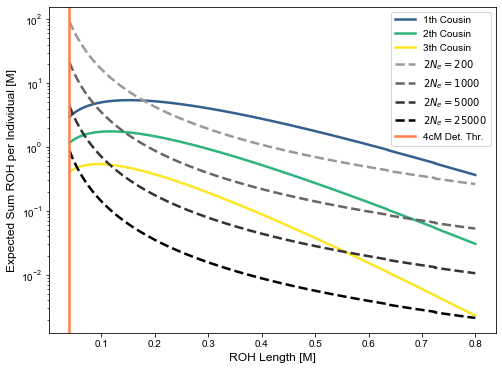

In [131]:
lw=2.5
fs=12
fs_l=10
figsize=(8,6)
savepath = "./figures_test/roh_expectations.pdf"

plt.figure(figsize=figsize)
ax = plt.gca()

cmap = cm.get_cmap('viridis')
cs = np.linspace(0.3,1,len(c_arr))

### Plot the Cousins
for i,c in enumerate(c_arr):
    ax.plot(x_mean, y_roh_cs[i,:], "-", c=cmap(cs[i]), lw=lw, label=f"{c}th Cousin")
    
cmap = cm.get_cmap('gray_r')
cs = np.linspace(0.4, 1.0, len(N_arr))

### Plot the Pop Sizes
for i,N in enumerate(N_arr):
    ax.plot(x_mean, y_roh_Ns[i,:], "--", c=cmap(cs[i]), lw=lw, label=f"$2N_e={N}$")

ax.set_xlabel("ROH Length [M]", fontsize=fs)
ax.set_ylabel("Expected Sum ROH per Individual [M]", fontsize=fs)

ax.set_yscale("log")
ax.axvline(x=0.04, c="coral", label="4cM Det. Thr.", lw=lw)
ax.legend(loc="upper right", fontsize=fs_l)
if len(save_path)>0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
    print(f"Saved figure to {savepath}")

plt.show()

## Functions

In [39]:
def roh_len_indef(l, Ne, G=35.44562, fac=1):
    """Indefinie function of ROH sharing Length
    [use Morgan units]"""
    Ne = fac * Ne # To take into account the factor of two
    pre = -8 / (Ne) * G
    num = (1/Ne) + 4*l
    den = 8* (1/Ne + 2*l)**2
    res = pre * num/den
    return res

def roh_len(l0, l1, Ne, fac=1, G=35.44562):
    """Expected ROH length between l0 and l1
    [return in Morgan]"""
    tot_l = roh_len_indef(l1, Ne, G=G, fac=fac) - roh_len_indef(l0, Ne, G=G, fac=fac)
    return tot_l

In [93]:
roh_len(0.04, 0.08, Ne=250, fac=1)

1.587429175755172

In [90]:
roh_len(0.04, 0.08, Ne=500, fac=1)

0.838170580379563

In [102]:
roh_len(0.04, 0.08, Ne=1000, fac=1)

0.43084720878859994

In [10]:
roh_len(0.04, 0.08, Ne=2000, fac=1)

0.21844982373360688

In [99]:
roh_len(0.04, 20000, Ne=250, fac=1)

3.2953906886548405

In [100]:
roh_len(0.04, 20000, Ne=500, fac=1)

1.7079650574608711

In [101]:
roh_len(0.04, 20000, Ne=1000, fac=1)

0.8697962493621086

In [8]:
roh_len(0.04, 20000, Ne=20000, fac=1)

0.04426543313785336

### Make Figure

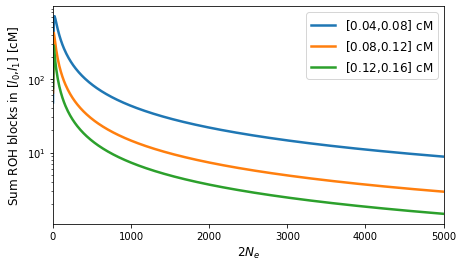

In [104]:
fs = 12
lw = 2.5
xlim=[0,5000]
x = np.linspace(xlim[0]+1, xlim[1], 500)
l_vec = np.array([[0.04,0.08],[0.08,0.12],[0.12, 0.16]]) # ]


plt.figure(figsize=(7,4))
ax = plt.gca()

for i,l in enumerate(l_vec):
    y =  np.array([roh_len(l[0], l[1], Ne=i, fac=1) for i in x]) * 100
    ax.plot(x, y, label=f"[${l[0]}$,${l[1]}$] cM", lw=lw)

ax.legend(fontsize=fs)
ax.set_xlabel(f"$2N_e$", fontsize=fs)
ax.set_ylabel(f"Sum ROH blocks in [$l_0$,$l_1$] [cM]", fontsize=fs)
ax.set_xlim(xlim)
ax.set_yscale("log")
plt.show()

In [17]:
bins = np.arange(0.04, 2.5,0.01)
y = np.zeros(len(bins)-1)

for i in range(1,len(bins)):
    y[i-1] =  roh_len(bins[i-1], bins[i], Ne=500, fac=1) * 100

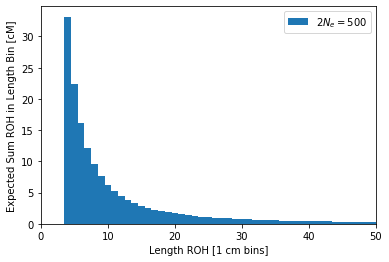

In [32]:
plt.figure()
plt.bar(bins[:-1]*100, y, width=1, label=f"$2N_e=500$")
plt.xlim([0,50])
plt.ylabel("Expected Sum ROH in Length Bin [cM]")
plt.xlabel("Length ROH [1 cm bins]")
#plt.yscale("log")
plt.legend(loc="upper right")
plt.show()

In [28]:
np.sum(y[:4])

83.81705803795634

In [ ]:
import pandas as pd
import numpy as np

# Functions to describe sharing of ROH:
### Migrate to Python Function eventually!

In [ ]:
### Don't need to run, produces one time Chr. Lengths
def load_h5(path, output=True):
        """Load and return the HDF5 File from Path"""
        f = h5py.File(path, "r")  # Load for Sanity Check. See below!
        if output == True:
            print("\nLoaded %i variants" % np.shape(f["calldata/GT"])[0])
            print("Loaded %i individuals" % np.shape(f["calldata/GT"])[1])
            # print(list(f["calldata"].keys()))
            # print(list(f["variants"].keys()))
            print(f"HDF5 loaded from {path}")
        return f

def chrom_length(ch, output=False):
    """Get and retrun length of Chromosome"""
    
    path1000G = "./Data/1000Genomes/HDF5/1240kHDF5/Eur1240chr" + str(ch) + ".hdf5"  # Path of 1000G (without chromosome part)
    f = load_h5(path1000G, output=output)
    rec = np.array(f["variants/MAP"])
    l = np.max(rec) - np.min(rec)  # Do the accessible Chromosomes
    return rec, l

ch_l = []
for i in range(1,23):
    a = chrom_length(i)[1]
    ch_l += [chrom_length(i)[1],]
print(ch_l)

### Functions for Cousins

In [4]:
e_roh = Expected_Roh()
#e_roh.exp_roh_len_in_bin_rel(l=[0.0,3], m=8, comm_anc=4, bins=1000) #/ np.sum(ch_l)

### Functions for Pop Size N_e

In [5]:
e_roh.exp_roh_len_in_bin_N(l=[0, 3.5], N=500, bins=10000)

35.68769749190413

In [6]:
e_roh.exp_roh_len_in_bin_rel(l=[0.4, 3.0], m=6, comm_anc=4)

0.5605230805435659

In [41]:
e_roh.exp_roh_len_in_bin_N(l=[0.4, 3.0], N=500, bins=10000)

0.13240664522164036

### Make some Figures

In [31]:
np.sum(e_roh_nr_c1)*bw

2.209837478611569

In [32]:
np.sum(e_roh_nr_c2)*bw

0.5528396767823635

### Plot Ne across t
Do it for ROH of length 4

In [52]:
bl_lengths = [0.04, 0.08, 0.12]
N=500

t_vec = np.arange(0,250)
y = np.array([e_roh.roh_pdf_allchr_t_N(bl, t=t_vec, N=N) for bl in bl_lengths])
y_cumsum = np.cumsum(y, axis=1) ## For Cumulative Sum

### Full Integral:
int_res = [e_roh.roh_pdf_allchr_N(x=bl, N=N) for bl in bl_lengths]

Saved figure to ./figures/manuscript/supplement/exp_dens_t_N.pdf


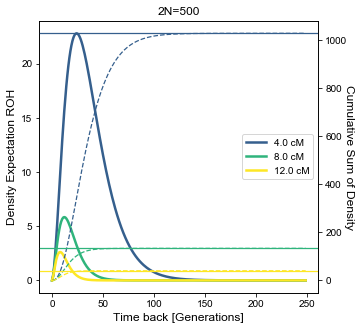

In [72]:
lw=2.5
fs=12
fs_l=10
figsize=(5,5)
savepath = "./figures/manuscript/supplement/exp_dens_t_N.pdf"

cmap = cm.get_cmap('viridis')
cs = np.linspace(0.3,1,len(bl_lengths))


plt.figure(figsize=figsize)
ax = plt.gca()
ax2 = ax.twinx()
#ax2.set_ylim(ax1.get_ylim())
#ax2.set_yticks(np.array([1,0]) * 1.1 - 0.05)
#ax2.set_yticklabels([])
#ax1.set_yticklabels([])
#ax2.set_ylabel(f"$\geq/\geq$ {m} Ref/Alt Reads", fontsize=fs*0.7, color=het_c)

for i, bl in enumerate(bl_lengths):
    ax.plot(t_vec, y[i,:], c=cmap(cs[i]), lw=lw, label=f"{bl*100} cM")
    ax2.plot(t_vec, y_cumsum[i,:], "--", c=cmap(cs[i]), lw = lw*0.5)

    
    ax.set_xlabel("Time back [Generations]", fontsize=fs)
    ax.set_ylabel("Density Expectation ROH", fontsize=fs)
    ax2.set_ylabel("Cumulative Sum of Density", labelpad=7, fontsize=fs, rotation=270)
    
    ax2.axhline(int_res[i], lw=lw*0.5, c=cmap(cs[i]))
    
#ax2.axhline(int_res[0], lw=lw*0.5, c=cmap(cs[0]), label="Analytic Integral")

ax.legend(loc="center right", fontsize=fs_l)
ax.set_title(f"2N={N}", fontsize=fs)

if len(savepath)>0:
    plt.savefig(savepath, bbox_inches = 'tight', pad_inches = 0, dpi=300)
    print(f"Saved figure to {savepath}")
#ax.set_yscale("log")
plt.show()

In [61]:
f"2N={N}"

'2N=500'

In [48]:
np.sum(y, axis=1)*0.001

array([1.02755322, 0.13324727, 0.03996148])